# Saha Equation (with number density of free electrons $n_e$)

Chapter 8, Caroll and Ostlie.

$$
\frac{N_{i+1}}{N_i} = \frac{2Z_{i+1}}{n_e Z_i} (\frac{2\pi m_e kT}{h^2})^{3/2} e^{-\chi_i/kT}
$$

# Saha Equation (with electron pressure $P_e$)

$$
\frac{N_{i+1}}{N_i} = \frac{2kT Z_{i+1}}{P_e Z_i} (\frac{2\pi m_e kT}{h^2})^{3/2} e^{-\chi_i/kT}
$$

## Partition function (Z)

$$
Z = \sum^{\infty}_{j=1} g_j e^{-(E_j-E_1)/kT}
$$

$h$ is plank contant

$m_e$ is electron mass

$\chi_i$ is the ionization energy needed to remove electron from atom 

$k$ = Boltzman constant

$E_a,E_b$ are energies (typically eV)

$g_a,g_b$ are number of degenerate states (i.e. how many different quantum states are there which have the same energy) , e.g.  for hydrogen:

> $g_b = 2n^2$


In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def saha_equation_pressure(Z_1, Z_2, k, T, P_e, m_e, chi_i, h):
    return \
    ((2 * k * T * Z_2) / (P_e * Z_1)) * \
    ((2 * math.pi * m_e * k * T) / h**2)**(3/2) * \
    math.e ** -(chi_i / (k*T))

In [3]:
def partition_function_j(j, E_j, E_1, k, T):
    """
    Calculate the value for one partition (j), of the partition function Z.
    Eq (8.7), Caroll and Ostlie p214.
    """
    return 2*(j**2) * math.e ** (-(E_j - E_1) / (k*T)) 

# Problem 8.7

In [4]:
j = 1
E_j = -13.6
E_1 = -13.6
k = 8.6173E-16
T = 10000

# j = 1
Z_1 = partition_function_j(j, E_j, E_1, k, T)

# j = 2
# E_j = -3.4
# Z_2 = partition_function(j, E_j, E_1, k, T)

print('Z_1: %s' % Z_1)
# print('Z_2: %s' % Z_2)

Z_1: 2.0


In [5]:
-(E_j - E_1)

-0.0

In [6]:
(-(E_j - E_1) / (k*T)) 

-0.0

In [7]:
 math.e ** (-(E_j - E_1) / (k*T)) 

1.0

# Problem 8.10

In this problem, you will follow a procedure similar to that of Example 8.1.4 for the case of a
stellar atmosphere composed of pure helium to find the temperature at the middle of the He I
partial ionization zone, where half of the He I atoms have been ionized. (Such an atmosphere would be found on a white dwarf of spectral type DB; see Section 16.1) 

The ionization energies of neutral helium and singly ionized helium are $\chi_I = 24.6 eV$ and $\chi_{II} = 54.4 eV$, respectively.

The partition functions are $Z_I = 1, Z_{II} = 2, Z_{III} = 1$ (as expected for any completely ionized atom). 

Use $P_e = 20 N m^{-2}$ for the electron pressure.

(a) Use Eq. (8.9) to find $N_{II}/N_I$ and $N_{III}/N_{II}$ for temperatures of 5000 K, 15,000 K, and 25,000K
How do they compare?

### Answer

$N_{II}/N_I$ - climbs rapidly from 10000K to 20000K, 50% at ~15000K, nears 100% ionization at 20000K)

$N_{III}/N_{II}$ - climbs less rapidly from 25000K to 40000K, 50% at ~32500K, nears 100% ionization at 41000K)

## REPLICATING EXAMPLE 8.1.4 p215

5000: 5.769709890712015e-08, 10000: 0.6999249846969674, 15000: 0.9991929471110168


<AxesSubplot:xlabel='Temp'>

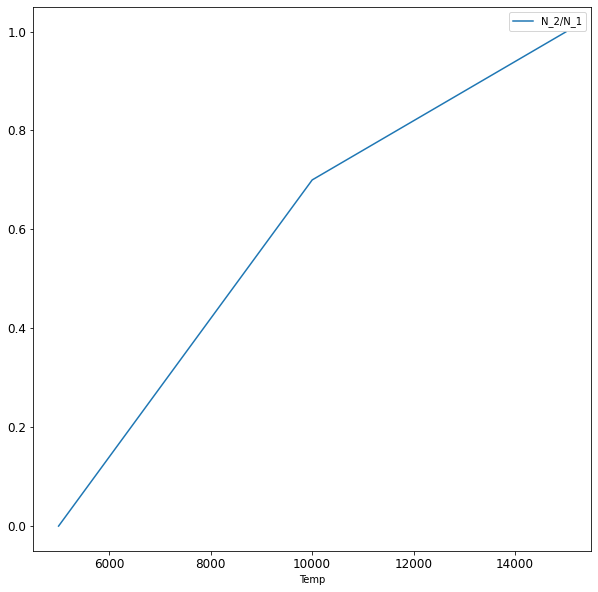

In [8]:
m_e = 9.10938215E-31 # electron mass kg
h = 6.62606896E-34   # plank constant J
k = 1.38065E-23      # boltzman constant J 

Z_1 = 2
Z_2 = 1
P_e = 20

chi_1_ev = 13.6
chi_1 = 2.17896e-18

# equation gives ratio of N_2/N_1
ratio1 = saha_equation_pressure(Z_1, Z_2, k, 5000, P_e, m_e, chi_1, h)
ratio2 = saha_equation_pressure(Z_1, Z_2, k, 10000, P_e, m_e, chi_1, h)
ratio3 = saha_equation_pressure(Z_1, Z_2, k, 15000, P_e, m_e, chi_1, h)

# convert ratio to fraction (i.e. 0-1)
frac1 = ratio1 / (1 + ratio1)
frac2 = ratio2 / (1 + ratio2)
frac3 = ratio3 / (1 + ratio3)

print('5000: %s, 10000: %s, 15000: %a' % (frac1,frac2,frac3))

df = pd.DataFrame({
    'Temp': [5000, 10000, 15000], 
    'N_2/N_1': [frac1, frac2, frac3]
})

df.plot(kind='line', x='Temp', figsize=(10,10), fontsize=12)

## Working for part A

In [59]:
# Part A, T = 5000K
k = 1.3806E-23
Z_1 = 1
Z_2 = 2
Z_3 = 1
P_e = 20

chi_1_ev = 24.6
chi_1 = 3.94135e-18

chi_2_ev = 54.4
chi_2 = 8.71584e-18

# make a range of temps to plot
temps = list(range(1000, 51000, 1000))

# ratio of N2/N1
n2_n1_ratios = {}
for t in temps:
    n2_n1_ratios[t] = saha_equation_pressure(Z_1, Z_2, k, t, P_e, m_e, chi_1, h)

# convert ratio to fraction (i.e. 0-1)
n2_n1_fracs = {}
for t in temps:
    n2_n1_fracs[t] = n2_n1_ratios[t] / (1 + n2_n1_ratios[t])

# print('n2_n1_ratios: %s' % n2_n1_ratios) 
# print('n2_n1_fracs: %s' % n2_n1_fracs)
# for t in temps:
#     print('T=%s -> %s' % (t, n2_n1_fracs[t]))

# ratio of N3/N2
n3_n2_ratios = {}
for t in temps:
    n3_n2_ratios[t] = saha_equation_pressure(Z_2, Z_3, k, t, P_e, m_e, chi_2, h)

# convert ratio to fraction (i.e. 0-1)
n3_n2_fracs = {}
for t in temps:
    n3_n2_fracs[t] = n3_n2_ratios[t] / (1 + n3_n2_ratios[t])
    
# print('n3_n2_ratios: %s' % n3_n2_ratios)
# print('n3_n2_fracs: %s' % n3_n3_fracs)
for t in temps:
    print('T=%s -> %s' % (t, n3_n2_fracs[t]))

T=1000 -> 3.5337767883346955e-270
T=2000 -> 2.441361265906274e-132
T=3000 -> 3.337845110818585e-86
T=4000 -> 4.826318876646053e-63
T=5000 -> 4.310948550337179e-49
T=6000 -> 9.368005807918376e-40
T=7000 -> 4.644701806224678e-33
T=8000 -> 5.103821633546967e-28
T=9000 -> 4.402952089469668e-24
T=10000 -> 6.375458428980402e-21
T=11000 -> 2.5146684338875714e-18
T=12000 -> 3.7327175756073216e-16
T=13000 -> 2.6088776023716944e-14
T=14000 -> 1.0077758841916619e-12
T=15000 -> 2.4202529735693083e-11
T=16000 -> 3.947505290937685e-10
T=17000 -> 4.67882039310066e-09
T=18000 -> 4.248030157480291e-08
T=19000 -> 3.0801191256632386e-07
T=20000 -> 1.8440275334863545e-06
T=21000 -> 9.365516936709338e-06
T=22000 -> 4.125492457062098e-05
T=23000 -> 0.00016052105808938327
T=24000 -> 0.0005600906257906541
T=25000 -> 0.001774223689574305
T=26000 -> 0.005151403009330251
T=27000 -> 0.01379345903880731
T=28000 -> 0.03410245015370983
T=29000 -> 0.07738013727990603
T=30000 -> 0.1586787610021083
T=31000 -> 0.2875544

<AxesSubplot:xlabel='Temp'>

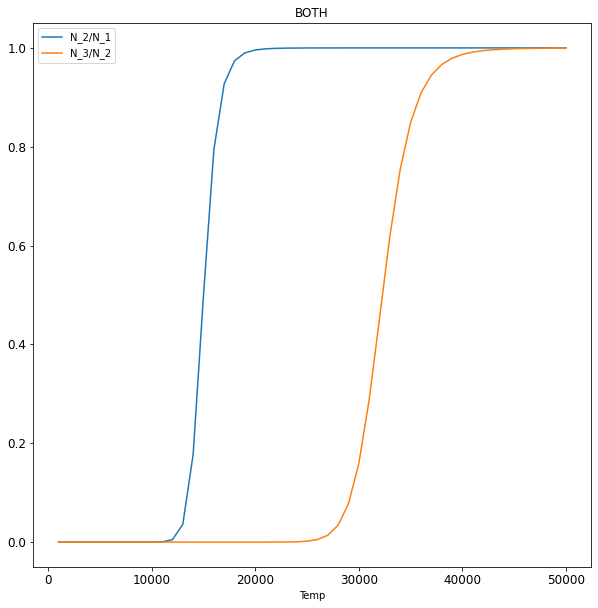

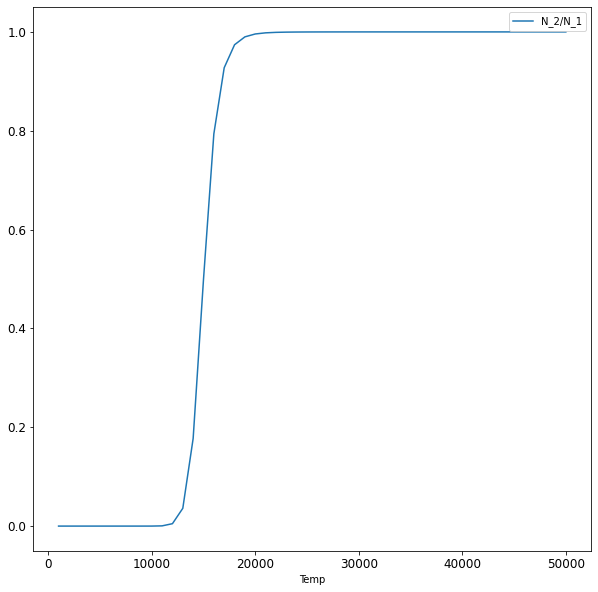

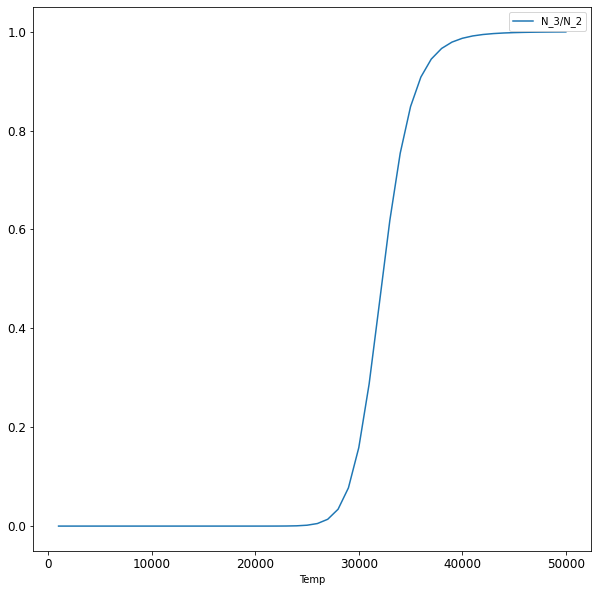

In [50]:
df = pd.DataFrame({
    'Temp': temps, 
    'N_2/N_1': list(n2_n1_fracs.values()),
    'N_3/N_2': list(n3_n2_fracs.values())
})

df.plot(title='BOTH', kind='line', x='Temp', figsize=(10,10), fontsize=12)

df.plot(kind='line', x='Temp', y='N_2/N_1', figsize=(10,10), fontsize=12)
df.plot(kind='line', x='Temp', y='N_3/N_2', figsize=(10,10), fontsize=12)

(b) Show that:

$$\frac{N_{II}}{N_{total}} = \frac{N_{II}}{(N_I+N_{II}+N_{III})}$$ 

can be expressed in terms of the ratios: $N_{II}/N_I$ and $N_{III}/N_{II}$

### Answer:

$$\frac{N_{II}}{N_{total}} = \frac{N_{II}}{(N_I+N_{II}+N_{III})} = \frac{N_2/N_1}{1 + N_2/N_1 + (N_3/N_2)(N_2/N_1)}$$ 

See also: http://dslavsk.sites.luc.edu/courses/phys380/homework/phys380-2011hw6s.pdf

(c) Make a graph of $\frac{N_{II}}{N_{total}}$ similar to Fig. 8.8 for a range of temperatures from 5000 K
to 25,000 K. 

What is the temperature at the middle of the He I partial ionization zone?
Because the temperatures of the middle of the hydrogen and He I partial ionization zones
are so similar, they are sometimes considered to be a single partial ionization zone with a
characteristic temperature of $1-1.5 *10^4K$.

## Answer

From the plot below we see temperature at the middle of the He I partial ionization zone is `25000K`

In [51]:
def nii_2_total(n2_n1, n3_n2):
    '''
    Implements $$N_2/N_{total}$$ as per answer part (b) above
    '''
    return n2_n1 / (1 + n2_n1 + n3_n2*n2_n1)

In [52]:
n_totals = []

for t in temps:
    ratio = nii_2_total(n2_n1_ratios[t], n3_n2_ratios[t])
    frac = ratio / (1+ratio)
    n_totals.append(frac)

<AxesSubplot:xlabel='Temp'>

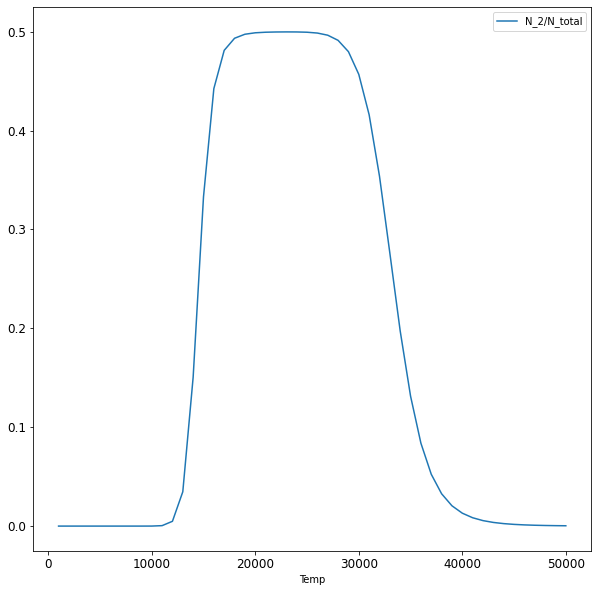

In [53]:
df = pd.DataFrame({
    'Temp': temps, 
    'N_2/N_total': n_totals
})
df.plot(kind='line', x='Temp', figsize=(10,10), fontsize=12)

# 8.13

Use the information in Example 8.1.5 to **calculate the ratio of doubly to singly ionized calcium
atoms (Ca III/Ca II)** in the Sun's photosphere. 

The ionization energy of Ca Il is $\chi_{II} = 11.9 eV$.

Use $Z_{III} = 1$ for the partition function of Ca III. 

Is your result consistent with the statement in Example 8.1.5 that in the solar photosphere?


> nearly all of the calcium atoms are available for forming the H and K lines of calcium

In [54]:
# We need to find ca3/ca2

chi_2_ev = 11.9 # eV
chi_2 = 1.90659e-18

z_2 = 2.3 # p218
Z_3 = 1 
T = 5777
Pe = 1.5

ca_ratio = saha_equation_pressure(Z_2, Z_3, k, T, Pe, m_e, chi_2, h)

# convert ratio to fraction (i.e. 0-1)
ca_frac = ca_ratio / (1 + ca_ratio)

ca_ratio, ca_frac

(0.002340453867446017, 0.002334988933566009)

## Answer

$\frac{Ca_3}{Ca_2} = 0.0023$

This implies there are very few _doubly_ ionized calcium atoms.

If most Ca atoms are singly ionized, they are available for forming H and K lines (these lines are known to come from Ca_2).

# 8.14

Consider a giant star and a main-sequence star of the same spectral type. 

Appendix G shows that the giant star, which has a lower atmospheric density, has a slightly lower temperature than the main-sequence star. 

Use the Saha equation to explain why this is so. Note that this means that there is not a perfect correspondence between temperature and spectral type!

---

Giant = lower density and temp

Main = higher density and temp

Saha = relationship between the observed spectra of stars and their temperatures.

> The spectrum of a star is directly related to the relative numbers of atoms and ions it contains because each atom or ion can absorb or emit radiation of a particular set of wavelengths. (https://www.britannica.com/science/Saha-equation)

So, the Giant star may have lower density/pressure and temp, but this is offset by the greater number of atoms/ions available to create spectra.